# $$ \textbf{Yüklü Çubuğun Elektrik Alanının Python İle Hesabı}$$

# $$\vec E = \frac{1}{4\pi\epsilon_{0}} \frac{q}{r^2}\hat r $$
# $$ \vec E = \frac{1}{4\pi\epsilon_{0}} \frac{q}{r^3}\vec r $$
# $$  \vec E = \frac{1}{4\pi\epsilon_{0}} \int \frac{\vec r - \vec r'}{|\vec r - \vec r'|^3}dq  $$
## yüklü bir çubuğu incelemek için tek boyutlu bir yük dağılımı oluşturmak yeterli olacaktır.
## $ \text{Çubuk İçin Bir Boyutlu Yük Dağılımı:} $
# $$ \lambda = \frac{Q}{L} = \frac{dq}{dy}, dq = \lambda dy $$
    
# $$ \vec E = \frac{1}{4\pi\epsilon_{0}} \int \frac{\lambda}{|\vec r - \vec r'|^3}(\vec r - \vec r') dr  $$
# $\vec r' Nerede?$
## $ \vec r' \rightarrow <0,t> -a \le t \le a$ Tahmin edeceğiniz gibi çubuğun x'i aynı iken y si sürekli değişmekte, z si ise olmamaktadır. L = 2a, a = 15, L = 30

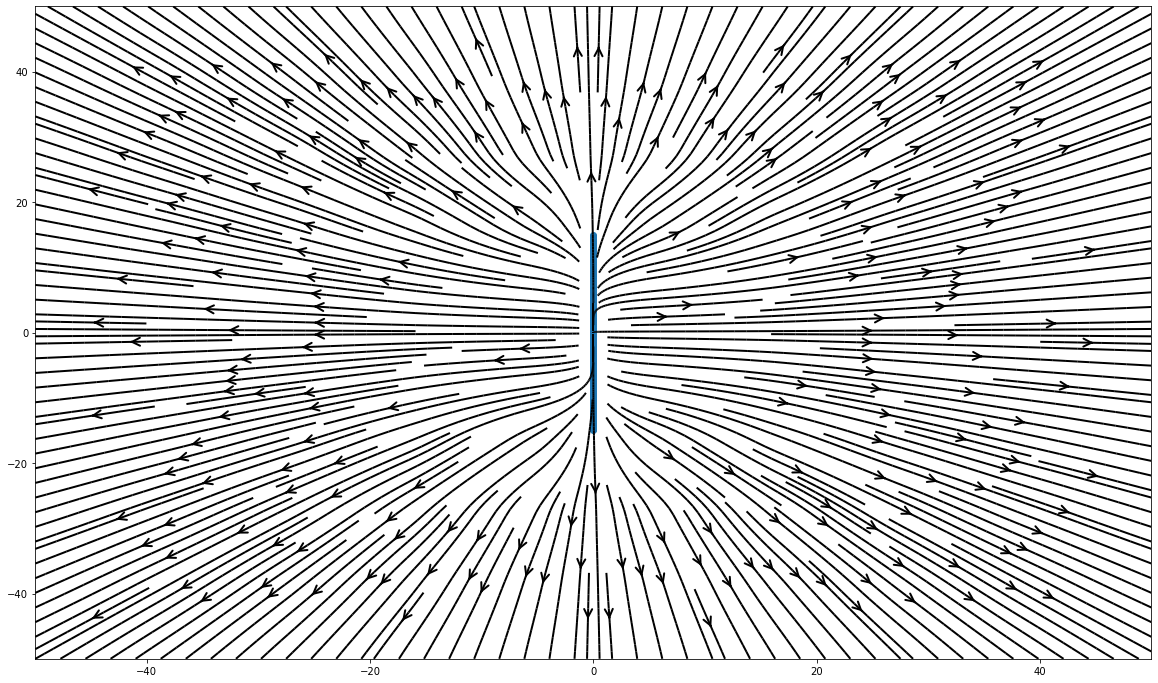

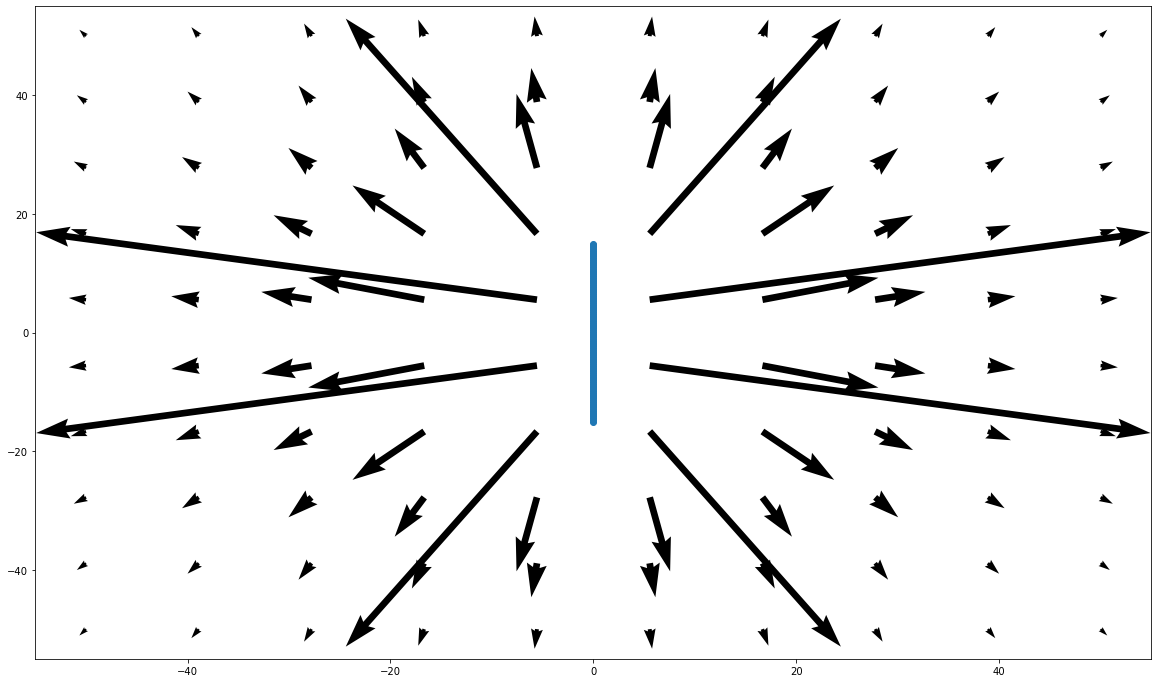

In [25]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
import sympy as smp
import matplotlib.pyplot as plt


# sembolik hesap için sembollerimizi tanımlayalım

t = smp.symbols('t')
x,y,a,Q = smp.symbols('x y a Q')
r = smp.Matrix([x,y]) #uzaydaki bir noktanın konumu
rp = smp.Matrix([0,t]) # r', çubuğumuzdaki bir noktanın konumu, bir çubukla uğraştığımız için çubuğun x lokasyonuna 0 verdim
sep = r - rp # çubuktaki bir nokta ile uzaydaki bir nokta arasındaki mesafe
#drpdt = smp.diff(rp,t).norm() # dr'/dt
lamb = 1.6*10**-19/30 #lambda mız bu olsun => Q = 1.6e-19 Coulomb , L = 30 metre

integrand = lamb * sep/sep.norm()**3 * (8.99*10**9) #integral sembolümün içerisi

dExdt = smp.lambdify([t,x,y], integrand[0])
dEydt = smp.lambdify([t,x,y], integrand[1])

def E(x,y): # elektrik alan dedğimiz şeyi tanımlayalım
    return np.array([quad(dExdt, -15, 15, args =(x,y))[0],
                     quad(dEydt, -15, 15, args =(x,y))[0] 
                    ])

# grafik sınırlarını tanımlayalım
X = np.linspace(-50,50,10)
Y = np.linspace(-50,50,10)
U,V = np.meshgrid(X,Y)

#Vektör alanımızı tanımlayalım
Efield = np.vectorize(E, signature = '(),()->(n)')(U,V)
Ex = Efield[:,:,0]
Ey = Efield[:,:,1]

plt.figure(figsize = (20,12))
plt.streamplot(U,V,Ex,Ey,
                        density=3,
                        linewidth=2,
                        color="black",
                        arrowsize=2,
                        arrowstyle="->")
plt.scatter(np.zeros(100),np.linspace(-15,15,100))

plt.figure(figsize = (20,12))
plt.quiver(U,V,Ex,Ey)
plt.scatter(np.zeros(100),np.linspace(-15,15,100))

In [4]:
E(1,1)

array([9.56750879e-11, 4.50124208e-13])

In [5]:
integrand

Matrix([
[                                         4.79466666666667e-11*x/(Abs(x)**2 + Abs(t - y)**2)**(3/2)],
[8990000000.0*(-5.33333333333333e-21*t + 5.33333333333333e-21*y)/(Abs(x)**2 + Abs(t - y)**2)**(3/2)]])

In [14]:
E(1,3)

array([9.56648502e-11, 7.17655016e-13])

In [33]:
smp.integrate(dExdt,x)[0]

SympifyError: Sympify of expression 'could not parse '<function _lambdifygenerated at 0x00000246BC177D30>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [31]:
help(smp.integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, meijerg=None, conds='piecewise', risch=None, heurisch=None, manual=None, **kwargs)
    integrate(f, var, ...)
    
    Explanation
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration
    
    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variab